In [ ]:
import random as rd
import pandas as pd
import math

Variant = 7

rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'((((a/c)-a)-b)-c)'

## func.asm

In [ ]:
;Function exit
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret

;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
    xor r8, r8
    cmp byte [rsi], '-'
    jne .loop
    inc rcx
    mov r8, 1

.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    cmp r8, 1
    jne .fin
    neg rax
.fin:
xor r8, r8
ret

print:
push rcx
mov [output], rax
mov eax, 1
mov edi, 1
mov rsi, output
mov edx, 1
syscall
pop rcx
ret

; rax input

print_num:
xor rbx, rbx
mov rcx, 10
test rax, rax
jns .loop
push rax
mov rax, '-'
call print
pop rax
neg rax

.loop:
xor rdx, rdx
div rcx
push rdx
inc rbx
cmp rax, 0
jne .loop

.print_loop:
pop rax
add rax, 48
call print
dec rbx
cmp rbx, 0
jne .print_loop
call new_line
ret



In [ ]:
format ELF64

public _start
public exit
public print_str

include 'func.asm'

section '.bss' writable
  place db ?

_start:

    mov rsi, [rsp+16]
    call str_number
    add rax, 48
    add rax, "%d"
    mov[place], rax
    mov rsi, place
    call print_str


    call exit

# Задача 1

In [ ]:
format ELF64

public _start

include 'func.asm'

section '.text' executable
  _start:
    mov rsi, [rsp+16]
    mov al, byte [rsi]
    mov bl, 10
    xor rcx, rcx

    ;в строку
    .iter:
        xor ah, ah
        div bl
        add ah, '0'
        mov dl, ah
        push rdx
        inc cl ;количество символов
        cmp al, 0
        jne .iter

    ;вывод
    .iter2:
        pop rdx
        mov [rsi], dl
        call print_str
        dec cl
        cmp cl, 0
        jne .iter2
    call new_line
    call exit

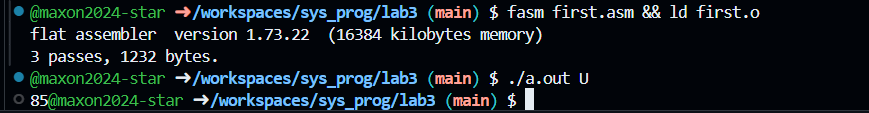

# Задача 2

In [ ]:
format ELF64

public _start
public print_num
public str_number

include 'func.asm'

section '.bss' writable
  ;buffer db ?
  a dq ?
  b dq ?
  c dq ?
  output dq 0

;((((a/c)-a)-b)-c)
_start:
    ; Сохраним указатель на массив аргументов
    mov     rsi, [rsp + 16]      ; В rsi - указатель на argv
    call str_number
    mov [a], rax

    mov     rsi, [rsp + 24]       ; Получаем 1-й аргумент (argv[1])
    call str_number
    mov [b], rax
    mov     rsi, [rsp + 32]
    call str_number
    mov [c], rax

  xor rax,rax
  ;add rax, a
  ;add rax, b
  ;add rax, c

  mov rax,[a]
  mov rbx, [c]

  test rbx, rbx
  jns fl1
  neg [c]
  mov r8, 1

  fl1:
  div [c]
  cmp r8, 1
  jne fl2
  neg [c]
  neg rax

  fl2:
  sub rax, [a]
  sub rax, [b]
  sub rax, [c]
  call print_num
  call exit

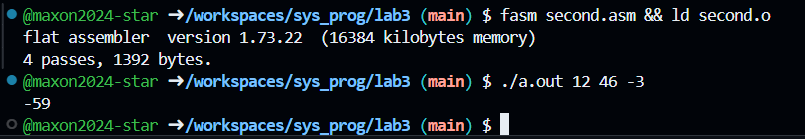

# Задача 3(С)

In [ ]:
#include <stdio.h>
#include <stdlib.h>
int main(int argc, char* argv []){
    double a = atoi(argv[1]), b=atoi(argv[2]), c=atoi(argv[3]), res;
    //(((c+b)/c)-c)
    res = ((((a/c)-a)-b)-c);
    printf("%f\n", res);
    return 0;
}

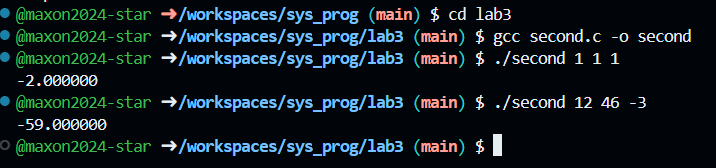